# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [1]:
#print(weather_api_key)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#creating empty lists
city_id = []
city_name = []
country_name = []
cloudiness = []
temperature = []
lat = []
long = []
humidity = []
wind_speed = []
max_temperature = []


#idx = 0

for city in cities:
    #print(city)
    
    response = requests.get(query_url+city).json()
    pprint(response)
    try:
        #print(response["name"])
        city_id.append(response["id"])
        city_name.append(response["name"])
        #added the country list while doing vacationpy
        country_name.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]["all"])
        temperature.append(response["main"]["temp"])
        max_temperature.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        print(f"City Name: {response['name']}, City ID: {response['id']}")
        #print(city_id_list)
        #print(city_name_list)
    except KeyError:
        print(f"The city {city} not found.")
    
#     idx = idx+1
#     if idx ==10:
#         break;

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.5167, 'lon': 57.5167},
 'dt': 1627403560,
 'id': 933995,
 'main': {'feels_like': 67.35,
          'humidity': 94,
          'pressure': 1020,
          'temp': 66.58,
          'temp_max': 66.58,
          'temp_min': 66.36},
 'name': 'Souillac',
 'rain': {'1h': 2.59},
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1627353749,
         'sunset': 1627393809,
         'type': 1},
 'timezone': 14400,
 'visibility': 5000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 140, 'speed': 8.05}}
City Name: Souillac, City ID: 933995
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 46.4856, 'lon': 135.8833},
 'dt': 1627403561,
 'id': 2013279,
 'main': {'feels_like': 71.47,
          'grnd_level': 938,
          'humidity': 84,
          'pressure': 1005,
     

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.8083, 'lon': -100.7837},
 'dt': 1627403957,
 'id': 5688025,
 'main': {'feels_like': 82.47,
          'humidity': 61,
          'pressure': 1015,
          'temp': 80.44,
          'temp_max': 80.44,
          'temp_min': 77.86},
 'name': 'Bismarck',
 'sys': {'country': 'US',
         'id': 3441,
         'sunrise': 1627384643,
         'sunset': 1627438899,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 9.22}}
City Name: Bismarck, City ID: 5688025
{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 2.0167, 'lon': 112.9333},
 'dt': 1627403957,
 'id': 1737185,
 'main': {'feels_like': 75.47,
          'grnd_level': 1006,
          'humidity': 97,
          'pressure': 1010,
          'sea_level': 1010,
          'te

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.2752, 'lon': -57.6007},
 'dt': 1627403960,
 'id': 3443631,
 'main': {'feels_like': 48.9,
          'grnd_level': 1019,
          'humidity': 36,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 52.29,
          'temp_max': 52.29,
          'temp_min': 52.29},
 'name': 'Bella Union',
 'sys': {'country': 'UY', 'sunrise': 1627382362, 'sunset': 1627420452},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'gust': 23.55, 'speed': 14.47}}
City Name: Bella Union, City ID: 3443631
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.918, 'lon': 25.5701},
 'dt': 1627403820,
 'id': 964420,
 'main': {'feels_like': 75.65,
          'humidity': 20,
          'pressure': 1011,
          'temp': 77.29,
          'temp_max': 77.29

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -3.8004, 'lon': 102.2655},
 'dt': 1627403962,
 'id': 1649150,
 'main': {'feels_like': 76.1,
          'grnd_level': 1009,
          'humidity': 83,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 75,
          'temp_max': 75,
          'temp_min': 75},
 'name': 'Bengkulu',
 'sys': {'country': 'ID', 'sunrise': 1627341546, 'sunset': 1627384532},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 79, 'gust': 7.16, 'speed': 5.06}}
City Name: Bengkulu, City ID: 1649150
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1627403922,
 'id': 2163355,
 'main': {'feels_like': 52.79,
          'humidity': 63,
          'pressure': 986,
          'temp': 54.66,
          'temp_max': 57.25,
          'temp

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 15.451, 'lon': 36.4},
 'dt': 1627403964,
 'id': 372753,
 'main': {'feels_like': 85.17,
          'grnd_level': 954,
          'humidity': 68,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 81.52,
          'temp_max': 81.52,
          'temp_min': 81.52},
 'name': 'Kassala',
 'sys': {'country': 'SD', 'sunrise': 1627355702, 'sunset': 1627401992},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 233, 'gust': 4.21, 'speed': 2.95}}
City Name: Kassala, City ID: 372753
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 21.3156, 'lon': -158.0072},
 'dt': 1627403964,
 'id': 5855051,
 'main': {'feels_like': 76.66,
          'humidity': 69,
          'pressure': 1016,
          'temp': 76.1,
          'temp_max': 77.09,
        

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 71.9667, 'lon': 102.5},
 'dt': 1627403966,
 'id': 2022572,
 'main': {'feels_like': 74.19,
          'grnd_level': 998,
          'humidity': 57,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 74.37,
          'temp_max': 74.37,
          'temp_min': 74.37},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 124, 'gust': 22.08, 'speed': 11.12}}
City Name: Khatanga, City ID: 2022572
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -33.9258, 'lon': 18.4232},
 'dt': 1627403966,
 'id': 3369157,
 'main': {'feels_like': 55.67,
          'humidity': 85,
          'pressure': 1017,
          'temp': 56.34,
          'temp_max': 58.26,
          'temp_mi

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': -34.7333, 'lon': 135.8667},
 'dt': 1627403923,
 'id': 2063036,
 'main': {'feels_like': 52.45,
          'grnd_level': 999,
          'humidity': 73,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 53.92,
          'temp_max': 53.92,
          'temp_min': 53.92},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU', 'sunrise': 1627422830, 'sunset': 1627459919},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 274, 'gust': 41.99, 'speed': 27.51}}
City Name: Port Lincoln, City ID: 2063036
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': -11.3, 'lon': 35.0333},
 'dt': 1627403968,
 'id': 877384,
 'main': {'feels_like': 50.61,
          'grnd_level': 886,
          'humidity': 84,
          'pressure': 1022,
          'sea

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -24.9667, 'lon': -57.5667},
 'dt': 1627403971,
 'id': 3439348,
 'main': {'feels_like': 55.98,
          'grnd_level': 1016,
          'humidity': 26,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 59.14,
          'temp_max': 59.59,
          'temp_min': 59.14},
 'name': 'Benjamín Aceval',
 'sys': {'country': 'PY',
         'id': 8575,
         'sunrise': 1627381794,
         'sunset': 1627421004,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 189, 'gust': 21.41, 'speed': 12.84}}
City Name: Benjamín Aceval, City ID: 3439348
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.0833},
 'dt': 1627403971,
 'id': 1282256,
 'main': {'feels_like': 86.76,
          'grnd_level': 1012,
 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -11.4386, 'lon': -61.4472},
 'dt': 1627403974,
 'id': 3925212,
 'main': {'feels_like': 100.9,
          'grnd_level': 993,
          'humidity': 22,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 101.88,
          'temp_max': 101.88,
          'temp_min': 101.88},
 'name': 'Cacoal',
 'sys': {'country': 'BR', 'sunrise': 1627381480, 'sunset': 1627423180},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 156, 'gust': 3.18, 'speed': 1.86}}
City Name: Cacoal, City ID: 3925212
{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': -8.1181, 'lon': 111.8935},
 'dt': 1627403974,
 'id': 1648082,
 'main': {'feels_like': 74.05,
          'grnd_level': 1002,
          'humidity': 88,
          'pressure': 1013,
          'sea_level': 1013,

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': -46.6, 'lon': 168.3333},
 'dt': 1627403976,
 'id': 2206939,
 'main': {'feels_like': 41.77,
          'grnd_level': 1006,
          'humidity': 71,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 48.79,
          'temp_max': 48.79,
          'temp_min': 48.79},
 'name': 'Bluff',
 'sys': {'country': 'NZ',
         'id': 2008959,
         'sunrise': 1627416793,
         'sunset': 1627450373,
         'type': 2},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 271, 'gust': 31.29, 'speed': 21.3}}
City Name: Bluff, City ID: 2206939
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 57.5058, 'lon': -1.7981},
 'dt': 1627403699,
 'id': 2640351,
 'main': {'feels_like': 61.7,
          'grnd_level': 1003,
          'humidity': 8

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 60.6167, 'lon': 16.7667},
 'dt': 1627403978,
 'id': 2680075,
 'main': {'feels_like': 71.11,
          'grnd_level': 1002,
          'humidity': 43,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 72.18,
          'temp_max': 72.19,
          'temp_min': 67.42},
 'name': 'Sandviken',
 'sys': {'country': 'SE',
         'id': 20702,
         'sunrise': 1627352249,
         'sunset': 1627414869,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 89, 'gust': 15.57, 'speed': 6.51}}
City Name: Sandviken, City ID: 2680075
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 25.2867, 'lon': 51.5333},
 'dt': 1627403979,
 'id': 290030,
 'main': {'feels_like': 110.43,
          'humidity': 61,
          'pressure'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.8043, 'lon': 67.7144},
 'dt': 1627403981,
 'id': 1516589,
 'main': {'feels_like': 71.44,
          'grnd_level': 968,
          'humidity': 23,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 73.33,
          'temp_max': 73.33,
          'temp_min': 73.33},
 'name': 'Zhezkazgan',
 'sys': {'country': 'KZ', 'sunrise': 1627343966, 'sunset': 1627398697},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 26, 'gust': 21.47, 'speed': 11.97}}
City Name: Zhezkazgan, City ID: 1516589
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.3428, 'lon': 57.7575},
 'dt': 1627403691,
 'id': 1106677,
 'main': {'feels_like': 67.21,
          'humidity': 94,
          'pressure': 1020,
          'temp': 66.45,
          'temp_max': 66.45,
 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 66.1451, 'lon': -65.7125},
 'dt': 1627403984,
 'id': 6096551,
 'main': {'feels_like': 41.4,
          'humidity': 100,
          'pressure': 1006,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Pangnirtung',
 'sys': {'country': 'CA',
         'id': 968,
         'sunrise': 1627368484,
         'sunset': 1627438224,
         'type': 1},
 'timezone': -14400,
 'visibility': 4828,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 260, 'speed': 5.75}}
City Name: Pangnirtung, City ID: 6096551
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.4081, 'lon': 57.7},
 'dt': 1627403984,
 'id': 934322,
 'main': {'feels_like': 67.26,
          'humidity': 94,
          'pressure': 1020,
          'temp': 66.49,
          'temp_max': 66.49,
          'temp_min': 66.49},
 'name': 'Mahébourg',
 'rain': {'1h':

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 36.6177, 'lon': -121.9166},
 'dt': 1627403987,
 'id': 5380437,
 'main': {'feels_like': 63.64,
          'humidity': 86,
          'pressure': 1016,
          'temp': 63.55,
          'temp_max': 80.15,
          'temp_min': 58.08},
 'name': 'Pacific Grove',
 'sys': {'country': 'US',
         'id': 2009350,
         'sunrise': 1627391394,
         'sunset': 1627442292,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'gust': 8.01, 'speed': 4}}
City Name: Pacific Grove, City ID: 5380437
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 49.4867, 'lon': 105.9228},
 'dt': 1627403987,
 'id': 2031964,
 'main': {'feels_like': 62.4,
          'grnd_level': 927,
          'humidity': 76,
          'pressure': 1004,
          'sea_l

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 62.8833, 'lon': 152.4333},
 'dt': 1627403990,
 'id': 2121373,
 'main': {'feels_like': 41.59,
          'grnd_level': 985,
          'humidity': 70,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 45.9,
          'temp_max': 45.9,
          'temp_min': 45.9},
 'name': 'Seymchan',
 'sys': {'country': 'RU', 'sunrise': 1627404995, 'sunset': 1627469803},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 326, 'gust': 8.48, 'speed': 8.41}}
City Name: Seymchan, City ID: 2121373
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.8522, 'lon': 44.24},
 'dt': 1627403990,
 'id': 527321,
 'main': {'feels_like': 41.22,
          'grnd_level': 1015,
          'humidity': 79,
          'pressure': 1017,
          'sea_level': 1017

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 20.8624, 'lon': 92.3058},
 'dt': 1627403993,
 'id': 1185095,
 'main': {'feels_like': 79.52,
          'grnd_level': 1000,
          'humidity': 93,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': 79.52,
          'temp_max': 79.52,
          'temp_min': 79.52},
 'name': 'Teknāf',
 'rain': {'1h': 7.49},
 'sys': {'country': 'BD', 'sunrise': 1627341769, 'sunset': 1627389091},
 'timezone': 21600,
 'visibility': 3566,
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10n',
              'id': 502,
              'main': 'Rain'}],
 'wind': {'deg': 221, 'gust': 22.64, 'speed': 13.98}}
City Name: Teknāf, City ID: 1185095
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.7162, 'lon': -122.9543},
 'dt': 1627403808,
 'id': 5789683,
 'main': {'feels_like': 63.5,
          'humidity': 77,
          'pressure': 1019,
          'temp': 63.81,
  

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 52.4503, 'lon': 64.6311},
 'dt': 1627403995,
 'id': 1519924,
 'main': {'feels_like': 61.3,
          'grnd_level': 999,
          'humidity': 50,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 62.96,
          'temp_max': 62.96,
          'temp_min': 62.96},
 'name': 'Kushmurun',
 'sys': {'country': 'KZ', 'sunrise': 1627343613, 'sunset': 1627400530},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 219, 'gust': 3.58, 'speed': 3.11}}
City Name: Kushmurun, City ID: 1519924
{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': -8.7676, 'lon': 160.7034},
 'dt': 1627403995,
 'id': 2109701,
 'main': {'feels_like': 78.13,
          'grnd_level': 1002,
          'humidity': 90,
          'pressure': 1010,
          'sea_level

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 54.7804, 'lon': -127.1743},
 'dt': 1627403999,
 'id': 6149996,
 'main': {'feels_like': 51.13,
          'humidity': 87,
          'pressure': 1020,
          'temp': 52.12,
          'temp_max': 52.12,
          'temp_min': 52.12},
 'name': 'Smithers',
 'sys': {'country': 'CA',
         'id': 990,
         'sunrise': 1627389038,
         'sunset': 1627447171,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 3.44}}
City Name: Smithers, City ID: 6149996
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 12.5847, 'lon': -81.7006},
 'dt': 1627403980,
 'id': 3670218,
 'main': {'feels_like': 99.73,
          'humidity': 70,
          'pressure': 1014,
          'temp': 87.82,
          'temp_max': 87.82,
          '

{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 48.8264, 'lon': 58.1442},
 'dt': 1627404011,
 'id': 609924,
 'main': {'feels_like': 75.18,
          'grnd_level': 986,
          'humidity': 28,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 76.51,
          'temp_max': 76.51,
          'temp_min': 76.51},
 'name': 'Emba',
 'sys': {'country': 'KZ', 'sunrise': 1627346045, 'sunset': 1627401212},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 32, 'gust': 24.09, 'speed': 15.23}}
City Name: Emba, City ID: 609924
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 28.5004, 'lon': -13.8627},
 'dt': 1627404011,
 'id': 2512186,
 'main': {'feels_like': 78.96,
          'humidity': 61,
          'pressure': 1012,
          'temp': 78.55,
          'temp_max': 78.55,
         

{'base': 'stations',
 'clouds': {'all': 14},
 'cod': 200,
 'coord': {'lat': -3.945, 'lon': 122.4989},
 'dt': 1627404013,
 'id': 1640344,
 'main': {'feels_like': 75.38,
          'grnd_level': 1007,
          'humidity': 94,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 73.87,
          'temp_max': 73.87,
          'temp_min': 73.87},
 'name': 'Kendari',
 'sys': {'country': 'ID', 'sunrise': 1627423099, 'sunset': 1627466068},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 227, 'gust': 3.87, 'speed': 3.69}}
City Name: Kendari, City ID: 1640344
{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 66.8333, 'lon': 70.8333},
 'dt': 1627403484,
 'id': 1486321,
 'main': {'feels_like': 44.31,
          'grnd_level': 1001,
          'humidity': 64,
          'pressure': 1001,
          'sea_level': 1001,


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -34.6833, 'lon': 150.8667},
 'dt': 1627404016,
 'id': 2161515,
 'main': {'feels_like': 52.79,
          'grnd_level': 1010,
          'humidity': 70,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 54.36,
          'temp_max': 55.38,
          'temp_min': 41},
 'name': 'Kiama',
 'sys': {'country': 'AU',
         'id': 2033627,
         'sunrise': 1627419226,
         'sunset': 1627456324,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 343, 'gust': 19.39, 'speed': 10.6}}
City Name: Kiama, City ID: 2161515
{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': -18.9689, 'lon': -49.465},
 'dt': 1627404016,
 'id': 3460523,
 'main': {'feels_like': 84.81,
          'grnd_level': 953,
          'humidity

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -45.8742, 'lon': 170.5036},
 'dt': 1627404019,
 'id': 2191562,
 'main': {'feels_like': 46.8,
          'humidity': 72,
          'pressure': 1009,
          'temp': 46.8,
          'temp_max': 46.8,
          'temp_min': 46.8},
 'name': 'Dunedin',
 'sys': {'country': 'NZ',
         'id': 75281,
         'sunrise': 1627416143,
         'sunset': 1627449981,
         'type': 2},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 33, 'gust': 3, 'speed': 1.01}}
City Name: Dunedin, City ID: 2191562
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.2167, 'lon': -51.1},
 'dt': 1627404019,
 'id': 3423146,
 'main': {'feels_like': 53.38,
          'humidity': 58,
          'pressure': 1015,
          'temp': 55.42,
          'temp_max': 55.42,
      

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': 67.667, 'lon': 12.6934},
 'dt': 1627404021,
 'id': 3137469,
 'main': {'feels_like': 56.64,
          'grnd_level': 1012,
          'humidity': 89,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 57.06,
          'temp_max': 66.27,
          'temp_min': 57.06},
 'name': 'Sørland',
 'sys': {'country': 'NO',
         'id': 1661,
         'sunrise': 1627347943,
         'sunset': 1627421131,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 19, 'gust': 14.36, 'speed': 12.64}}
City Name: Sørland, City ID: 3137469
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -9.0853, 'lon': -78.5783},
 'dt': 1627403946,
 'id': 3698304,
 'main': {'feels_like': 70.75,
          'grnd_level': 1014,
          'humidity': 72,
 

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': 66.7697, 'lon': 123.3711},
 'dt': 1627404024,
 'id': 2012530,
 'main': {'feels_like': 50.13,
          'grnd_level': 1005,
          'humidity': 77,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 51.64,
          'temp_max': 51.64,
          'temp_min': 51.64},
 'name': 'Zhigansk',
 'sys': {'country': 'RU', 'sunrise': 1627409016, 'sunset': 1627479732},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 349, 'gust': 21.14, 'speed': 11.45}}
City Name: Zhigansk, City ID: 2012530
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.9167, 'lon': 96.1667},
 'dt': 1627404024,
 'id': 1254709,
 'main': {'feels_like': 79.25,
          'grnd_level': 977,
          'humidity': 79,
          'pressure': 1001,
          'sea_level'

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 57.4915, 'lon': 10.4961},
 'dt': 1627404027,
 'id': 2612274,
 'main': {'feels_like': 68.58,
          'grnd_level': 1007,
          'humidity': 87,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 67.98,
          'temp_max': 69.03,
          'temp_min': 67.98},
 'name': 'Strandby',
 'sys': {'country': 'DK',
         'id': 1600,
         'sunrise': 1627355055,
         'sunset': 1627415073,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 181, 'gust': 6.35, 'speed': 2.59}}
City Name: Strandby, City ID: 2612274
{'cod': '404', 'message': 'city not found'}
The city dubenskiy not found.
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -5.795, 'lon': -35.2094},
 'dt': 1627404027,
 'id': 3394023,
 'main'

{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -25.1667, 'lon': 45.05},
 'dt': 1627404029,
 'id': 1067565,
 'main': {'feels_like': 60.78,
          'grnd_level': 1007,
          'humidity': 67,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 61.75,
          'temp_max': 61.75,
          'temp_min': 61.75},
 'name': 'Beloha',
 'sys': {'country': 'MG', 'sunrise': 1627357194, 'sunset': 1627396348},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 118, 'gust': 24.61, 'speed': 9.35}}
City Name: Beloha, City ID: 1067565
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.8333, 'lon': 143.1667},
 'dt': 1627404029,
 'id': 2122783,
 'main': {'feels_like': 60.08,
          'grnd_level': 1005,
          'humidity': 99,
          'pressure': 1006,
          'sea_level': 100

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.5011, 'lon': -165.4064},
 'dt': 1627404033,
 'id': 5870133,
 'main': {'feels_like': 48.87,
          'humidity': 87,
          'pressure': 1003,
          'temp': 50.07,
          'temp_max': 50.07,
          'temp_min': 49.1},
 'name': 'Nome',
 'rain': {'1h': 1.52},
 'sys': {'country': 'US',
         'id': 7770,
         'sunrise': 1627393808,
         'sunset': 1627460752,
         'type': 1},
 'timezone': -28800,
 'visibility': 9656,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 220, 'speed': 14.97}}
City Name: Nome, City ID: 5870133
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.6121, 'lon': -116.3915},
 'dt': 1627404026,
 'id': 5600685,
 'main': {'feels_like': 80.44,
          'humidity': 39,


{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.0205, 'lon': -93.218},
 'dt': 1627404036,
 'id': 5044290,
 'main': {'feels_like': 90.09,
          'humidity': 61,
          'pressure': 1014,
          'temp': 85.28,
          'temp_max': 88.92,
          'temp_min': 80.91},
 'name': 'Saint Anthony',
 'sys': {'country': 'US',
         'id': 2009535,
         'sunrise': 1627383168,
         'sunset': 1627436743,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 226, 'gust': 8.01, 'speed': 4}}
City Name: Saint Anthony, City ID: 5044290
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -14.8333, 'lon': -64.9},
 'dt': 1627404037,
 'id': 3902377,
 'main': {'feels_like': 76.3,
          'humidity': 83,
          'pressure': 1016,
          'temp': 75.18,
          'temp_max': 75.1

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 63.5671, 'lon': 53.6835},
 'dt': 1627404039,
 'id': 479411,
 'main': {'feels_like': 40.14,
          'grnd_level': 997,
          'humidity': 89,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 45.54,
          'temp_max': 45.54,
          'temp_min': 45.54},
 'name': 'Ukhta',
 'sys': {'country': 'RU', 'sunrise': 1627341746, 'sunset': 1627407652},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 301, 'gust': 24.63, 'speed': 11.01}}
City Name: Ukhta, City ID: 479411
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -8.4753, 'lon': -74.8058},
 'dt': 1627404039,
 'id': 3733380,
 'main': {'feels_like': 87.01,
          'grnd_level': 993,
          'humidity': 39,
          'pressure': 1013,
          'sea_level': 1013,


{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 56.5525, 'lon': 26.9245},
 'dt': 1627404042,
 'id': 454178,
 'main': {'feels_like': 72.45,
          'grnd_level': 998,
          'humidity': 74,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 72.07,
          'temp_max': 72.07,
          'temp_min': 72.07},
 'name': 'Viļāni',
 'rain': {'1h': 0.89},
 'sys': {'country': 'LV', 'sunrise': 1627351439, 'sunset': 1627410803},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 146, 'gust': 23.13, 'speed': 11.01}}
City Name: Viļāni, City ID: 454178
{'base': 'stations',
 'clouds': {'all': 19},
 'cod': 200,
 'coord': {'lat': 58.8353, 'lon': 125.4869},
 'dt': 1627404042,
 'id': 2019135,
 'main': {'feels_like': 62.82,
          'grnd_level': 965,
          'humidity': 94,
          'pressure': 1007,
          '

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -28.7667, 'lon': 114.6},
 'dt': 1627404045,
 'id': 2070998,
 'main': {'feels_like': 58.44,
          'humidity': 72,
          'pressure': 1013,
          'temp': 59.41,
          'temp_max': 60.13,
          'temp_min': 59.41},
 'name': 'Geraldton',
 'sys': {'country': 'AU',
         'id': 9522,
         'sunrise': 1627427251,
         'sunset': 1627465707,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.75}}
City Name: Geraldton, City ID: 2070998
{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 43.4209, 'lon': -2.7215},
 'dt': 1627404045,
 'id': 3128174,
 'main': {'feels_like': 71.58,
          'grnd_level': 1014,
          'humidity': 75,
          'pressure': 1016,
          'sea_level': 1016,
      

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -6.8844, 'lon': 112.2051},
 'dt': 1627404048,
 'id': 8079926,
 'main': {'feels_like': 74.86,
          'grnd_level': 1011,
          'humidity': 85,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 73.78,
          'temp_max': 73.78,
          'temp_min': 73.78},
 'name': 'Labuhan',
 'sys': {'country': 'ID', 'sunrise': 1627339421, 'sunset': 1627381887},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 174, 'gust': 9.86, 'speed': 7.07}}
City Name: Labuhan, City ID: 8079926
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 5.5577, 'lon': 95.3222},
 'dt': 1627404048,
 'id': 1215502,
 'main': {'feels_like': 85.78,
          'grnd_level': 1009,
          'humidity': 83,
          'pressure': 1010,
          'sea_level': 

{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 46.8333, 'lon': 130.35},
 'dt': 1627404050,
 'id': 2036581,
 'main': {'feels_like': 76.41,
          'grnd_level': 994,
          'humidity': 73,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 75.7,
          'temp_max': 75.7,
          'temp_min': 75.7},
 'name': 'Jiamusi',
 'sys': {'country': 'CN', 'sunrise': 1627415591, 'sunset': 1627469807},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 286, 'gust': 2.15, 'speed': 1.01}}
City Name: Jiamusi, City ID: 2036581
{'cod': '404', 'message': 'city not found'}
The city milingimbi not found.
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.8, 'lon': 158.6667},
 'dt': 1627404050,
 'id': 2120612,
 'main': {'feels_like': 51.33,
          'grnd_level': 995,
          'humidit

{'base': 'stations',
 'clouds': {'all': 37},
 'cod': 200,
 'coord': {'lat': -34.4833, 'lon': -54.3333},
 'dt': 1627404053,
 'id': 3440777,
 'main': {'feels_like': 40.39,
          'grnd_level': 1013,
          'humidity': 55,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 47.53,
          'temp_max': 47.53,
          'temp_min': 47.53},
 'name': 'Rocha',
 'sys': {'country': 'UY', 'sunrise': 1627382068, 'sunset': 1627419178},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'gust': 28.5, 'speed': 19.86}}
City Name: Rocha, City ID: 3440777
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 42.8, 'lon': 93.45},
 'dt': 1627404053,
 'id': 1529484,
 'main': {'feels_like': 86.68,
          'grnd_level': 918,
          'humidity': 15,
          'pressure': 997,
          'sea_level': 997,
   

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 39.25, 'lon': 20.7847},
 'dt': 1627404055,
 'id': 252939,
 'main': {'feels_like': 83.23,
          'grnd_level': 1006,
          'humidity': 41,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 83.79,
          'temp_max': 99.57,
          'temp_min': 83.23},
 'name': 'Thesprotikó',
 'sys': {'country': 'GR',
         'id': 6638,
         'sunrise': 1627356747,
         'sunset': 1627408442,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 147, 'gust': 4.23, 'speed': 3.62}}
City Name: Thesprotikó, City ID: 252939
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 26.5851, 'lon': 101.7128},
 'dt': 1627404055,
 'id': 6929460,
 'main': {'feels_like': 73.38,
          'grnd_level': 884,
          'hum

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 51.9959, 'lon': 84.9896},
 'dt': 1627404057,
 'id': 1510502,
 'main': {'feels_like': 54.88,
          'grnd_level': 979,
          'humidity': 80,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 55.83,
          'temp_max': 55.83,
          'temp_min': 55.83},
 'name': 'Belokurikha',
 'sys': {'country': 'RU', 'sunrise': 1627338841, 'sunset': 1627395530},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 325, 'gust': 1.83, 'speed': 1.5}}
City Name: Belokurikha, City ID: 1510502
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 28.4204, 'lon': -14.0131},
 'dt': 1627404057,
 'id': 2515271,
 'main': {'feels_like': 76.15,
          'humidity': 61,
          'pressure': 1012,
          'temp': 75.99,
          'temp_max': 75

{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 14.4, 'lon': 46.4667},
 'dt': 1627404060,
 'id': 72181,
 'main': {'feels_like': 78.4,
          'grnd_level': 883,
          'humidity': 71,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 77.61,
          'temp_max': 77.61,
          'temp_min': 77.61},
 'name': 'Marzuq',
 'sys': {'country': 'YE', 'sunrise': 1627353381, 'sunset': 1627399481},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 152, 'gust': 10.6, 'speed': 9.82}}
City Name: Marzuq, City ID: 72181
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.3468, 'lon': -57.6065},
 'dt': 1627404060,
 'id': 3437863,
 'main': {'feels_like': 56.84,
          'humidity': 47,
          'pressure': 1027,
          'temp': 59.04,
          'temp_max': 59.04,
          

{'base': 'stations',
 'clouds': {'all': 26},
 'cod': 200,
 'coord': {'lat': 44.0213, 'lon': 144.2697},
 'dt': 1627404063,
 'id': 2130741,
 'main': {'feels_like': 73.35,
          'grnd_level': 1005,
          'humidity': 96,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 71.94,
          'temp_max': 71.94,
          'temp_min': 71.94},
 'name': 'Abashiri',
 'sys': {'country': 'JP',
         'id': 20157,
         'sunrise': 1627412773,
         'sunset': 1627465943,
         'type': 2},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 178, 'gust': 16.08, 'speed': 9.46}}
City Name: Abashiri, City ID: 2130741
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 18.7369, 'lon': 7.3853},
 'dt': 1627404063,
 'id': 2447513,
 'main': {'feels_like': 81.75,
          'grnd_level': 962,
          'humi

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 70.2396, 'lon': 22.3479},
 'dt': 1627404066,
 'id': 778362,
 'main': {'feels_like': 60.91,
          'grnd_level': 1017,
          'humidity': 87,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 61.02,
          'temp_max': 68.07,
          'temp_min': 54.52},
 'name': 'Øksfjord',
 'sys': {'country': 'NO', 'id': 1634, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 7200,
 'visibility': 8635,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'gust': 3.15, 'speed': 3.69}}
City Name: Øksfjord, City ID: 778362
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 14.9951, 'lon': -2.9517},
 'dt': 1627404066,
 'id': 2458334,
 'main': {'feels_like': 95.13,
          'grnd_level': 975,
          'humidity': 46,
          'pressure': 1008,
          'sea_level': 1

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.7597, 'lon': 86.1469},
 'dt': 1627404069,
 'id': 1529376,
 'main': {'feels_like': 87.28,
          'grnd_level': 898,
          'humidity': 16,
          'pressure': 997,
          'sea_level': 997,
          'temp': 91.38,
          'temp_max': 91.38,
          'temp_min': 91.38},
 'name': 'Korla',
 'sys': {'country': 'CN', 'sunrise': 1627427115, 'sunset': 1627479500},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'gust': 4.34, 'speed': 3.78}}
City Name: Korla, City ID: 1529376
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.194, 'lon': -82.5271},
 'dt': 1627404069,
 'id': 4231997,
 'main': {'feels_like': 89.85,
          'grnd_level': 999,
          'humidity': 50,
          'pressure': 1015,
          'sea_level': 1015,
          't

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 56.0064, 'lon': 90.3914},
 'dt': 1627404071,
 'id': 1497951,
 'main': {'feels_like': 52.16,
          'grnd_level': 979,
          'humidity': 94,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 52.77,
          'temp_max': 52.77,
          'temp_min': 52.77},
 'name': 'Nazarovo',
 'sys': {'country': 'RU', 'sunrise': 1627336371, 'sunset': 1627395407},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 302, 'gust': 5.28, 'speed': 4.34}}
City Name: Nazarovo, City ID: 1497951
{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': 50.5594, 'lon': 58.2747},
 'dt': 1627404072,
 'id': 610416,
 'main': {'feels_like': 64.33,
          'grnd_level': 966,
          'humidity': 39,
          'pressure': 1015,
          'sea_level': 1

{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 59.9378, 'lon': 60.081},
 'dt': 1627404074,
 'id': 1486984,
 'main': {'feels_like': 44.58,
          'grnd_level': 980,
          'humidity': 71,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 47.89,
          'temp_max': 47.89,
          'temp_min': 47.89},
 'name': 'Volchansk',
 'sys': {'country': 'RU', 'sunrise': 1627342149, 'sunset': 1627404178},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'gust': 19.19, 'speed': 7.16}}
City Name: Volchansk, City ID: 1486984
{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': 2.3284, 'lon': 37.9899},
 'dt': 1627404074,
 'id': 187585,
 'main': {'feels_like': 69.96,
          'grnd_level': 867,
          'humidity': 40,
          'pressure': 1013,
          'sea_level': 101

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.4451, 'lon': 12.9801},
 'dt': 1627404077,
 'id': 2214827,
 'main': {'feels_like': 87.3,
          'grnd_level': 961,
          'humidity': 18,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 91.22,
          'temp_max': 91.22,
          'temp_min': 91.22},
 'name': 'Mizdah',
 'sys': {'country': 'LY', 'sunrise': 1627359668, 'sunset': 1627409268},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 107, 'gust': 9.8, 'speed': 11.32}}
City Name: Mizdah, City ID: 2214827
{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': -19.9842, 'lon': 57.6142},
 'dt': 1627404077,
 'id': 934649,
 'main': {'feels_like': 66.78,
          'grnd_level': 1019,
          'humidity': 79,
          'pressure': 1020,
          'sea_level': 1020,
        

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 3.7833, 'lon': 72.9667},
 'dt': 1627404079,
 'id': 1337605,
 'main': {'feels_like': 89.4,
          'grnd_level': 1012,
          'humidity': 76,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 82.71,
          'temp_max': 82.71,
          'temp_min': 82.71},
 'name': 'Mahibadhoo',
 'sys': {'country': 'MV', 'sunrise': 1627347943, 'sunset': 1627392199},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'gust': 13.76, 'speed': 13.02}}
City Name: Mahibadhoo, City ID: 1337605
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -23.5333, 'lon': 148.1667},
 'dt': 1627404079,
 'id': 2167426,
 'main': {'feels_like': 51.49,
          'humidity': 70,
          'pressure': 1020,
          'temp': 53.19,
          'temp_max':

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': 15.1, 'lon': -23.6833},
 'dt': 1627404082,
 'id': 3374888,
 'main': {'feels_like': 79.41,
          'grnd_level': 965,
          'humidity': 75,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 78.35,
          'temp_max': 78.35,
          'temp_min': 78.35},
 'name': 'Assomada',
 'sys': {'country': 'CV',
         'id': 2462,
         'sunrise': 1627370157,
         'sunset': 1627416377,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 345, 'gust': 9.89, 'speed': 9.26}}
City Name: Assomada, City ID: 3374888
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.217, 'lon': -63.0578},
 'dt': 1627404083,
 'id': 3573374,
 'main': {'feels_like': 93.52,
          'humidity': 70,
          'pressure': 1017

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.9566, 'lon': 24.7284},
 'dt': 1627404086,
 'id': 942511,
 'main': {'feels_like': 46.36,
          'grnd_level': 888,
          'humidity': 34,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 49.96,
          'temp_max': 49.96,
          'temp_min': 49.96},
 'name': 'Vryburg',
 'sys': {'country': 'ZA', 'sunrise': 1627362254, 'sunset': 1627401043},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 331, 'gust': 8.93, 'speed': 8.93}}
City Name: Vryburg, City ID: 942511
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -22.4333, 'lon': -151.3333},
 'dt': 1627404086,
 'id': 4034188,
 'main': {'feels_like': 74.71,
          'grnd_level': 1014,
          'humidity': 79,
          'pressure': 1014,
          'sea_level': 1014,
  

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 24.5133, 'lon': 117.6556},
 'dt': 1627404089,
 'id': 1785018,
 'main': {'feels_like': 94.33,
          'grnd_level': 994,
          'humidity': 80,
          'pressure': 996,
          'sea_level': 996,
          'temp': 84.13,
          'temp_max': 84.13,
          'temp_min': 84.13},
 'name': 'Zhangzhou',
 'sys': {'country': 'CN',
         'id': 9649,
         'sunrise': 1627421741,
         'sunset': 1627469750,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'gust': 1.68, 'speed': 1.45}}
City Name: Zhangzhou, City ID: 1785018
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 50.012, 'lon': 1.5176},
 'dt': 1627404089,
 'id': 3034366,
 'main': {'feels_like': 68.54,
          'grnd_level': 1008,
          'humidity'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 59.0556, 'lon': 80.8572},
 'dt': 1627404091,
 'id': 1504382,
 'main': {'feels_like': 55.98,
          'grnd_level': 1000,
          'humidity': 66,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 57.43,
          'temp_max': 57.43,
          'temp_min': 57.43},
 'name': 'Kargasok',
 'sys': {'country': 'RU', 'sunrise': 1627337535, 'sunset': 1627398820},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 228, 'gust': 14.61, 'speed': 6.49}}
City Name: Kargasok, City ID: 1504382
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.15, 'lon': 28.5833},
 'dt': 1627404091,
 'id': 894701,
 'main': {'feels_like': 50.67,
          'grnd_level': 873,
          'humidity': 33,
          'pressure': 1023,
          'sea_level': 1

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
city_df = pd.DataFrame({"City": city_name,
                       "ID": city_id,
                        "Country" : country_name,
                       "Cloudiness": cloudiness,
                       "Temperature": temperature, "Max Temperature": max_temperature,
                       "Latitude": lat,
                       "Longitude": long,
                       "Humidity": humidity,
                       "Wind Speed": wind_speed})

city_df.to_csv(output_data_file, header=True, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = city_df.index[city_df['Humidity'] > 100].tolist()
humidity_indices

[]

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [31]:
city_clean_df = city_df.drop(humidity_indices)
city_clean_df.head()

,City,ID,Country,Cloudiness,Temperature,Max Temperature,Latitude,Longitude,Humidity,Wind Speed
0,Souillac,933995,MU,75,66.58,66.58,-20.5167,57.5167,94,8.05
1,Vostok,2013279,RU,93,70.75,70.75,46.4856,135.8833,84,3.13
2,Saint George,5546220,US,1,82.60,87.53,37.1041,-113.5841,63,1.99
3,Dikson,1507390,RU,100,56.12,56.12,73.5069,80.5464,89,16.91
4,Ushuaia,3833367,AR,90,37.06,37.06,-54.8000,-68.3000,87,0.00


In [34]:
#verify the original data not touched
city_df.head()

,City,ID,Country,Cloudiness,Temperature,Max Temperature,Latitude,Longitude,Humidity,Wind Speed
0,Souillac,933995,MU,75,66.58,66.58,-20.5167,57.5167,94,8.05
1,Vostok,2013279,RU,93,70.75,70.75,46.4856,135.8833,84,3.13
2,Saint George,5546220,US,1,82.60,87.53,37.1041,-113.5841,63,1.99
3,Dikson,1507390,RU,100,56.12,56.12,73.5069,80.5464,89,16.91
4,Ushuaia,3833367,AR,90,37.06,37.06,-54.8000,-68.3000,87,0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

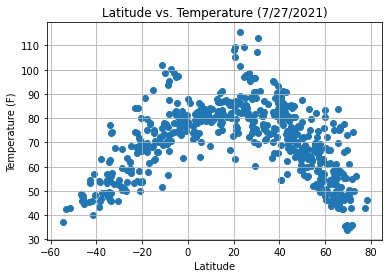

In [69]:
plt.scatter(city_df["Latitude"], city_df["Temperature"])
plt.title("Latitude vs. Temperature (7/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("../WeatherPy/Images/Latitude vs Temperature.png")

In [ ]:
# #What is the code analyzing?
# Purpose of this plot is to logically observe a trend of temperature with latitude. 
# This scatter of randomly selected data shows that temperature rises closer to the equator. 

## Latitude vs. Humidity Plot

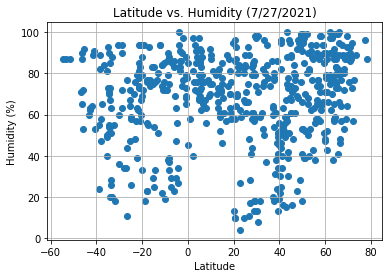

In [70]:
plt.scatter(city_df["Latitude"], city_df["Humidity"])
plt.title("Latitude vs. Humidity (7/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../WeatherPy/Images/Latitude vs Humidity.png")

In [ ]:
# #What is the code analyzing?
# Since the percentage of humidity affects temperature and therefore measures temperature indirectly,
# plotting latitude and humidity will show the relationship of weather as latitude is closer to the equator.

## Latitude vs. Cloudiness Plot

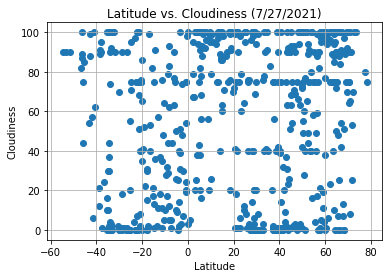

In [71]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness (7/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../WeatherPy/Images/Latitude vs Cloudiness.png")

In [ ]:
# #What is the code analyzing?
# Due to the scientific facts that tell us winds push water vapor towards the equator,
# this plot aims to prove the fact using data.

## Latitude vs. Wind Speed Plot

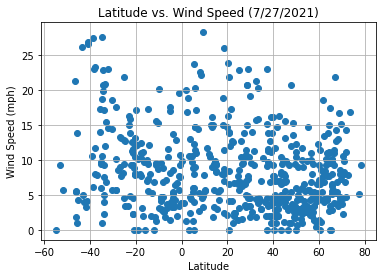

In [72]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"])
plt.title("Latitude vs. Wind Speed (7/27/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../WeatherPy/Images/Latitude vs Wind Speed.png")

In [ ]:
# #What is the code analyzing?
# Generally, it is known that wind speed is higher along the poles. 
# The aim of this plot is to observe data that supports the fact and to show that the temperature is lower at the poles.

## Linear Regression

In [39]:
nor = city_df['Latitude'] >=0
sou = city_df['Latitude'] <0
nor_hemis = city_df[nor]
#nor_hemis.head()
sou_hemis = city_df[sou]
#sou_hemis.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

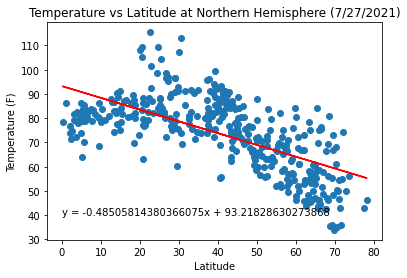

In [73]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Temperature vs Latitude at Northern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

In [ ]:
# #analysis
# As observed in the scatter in the beginning, linear regression here shows the temperature decreases away from the equator. 
# The slope is negative, supporting the fact that temperature is lower at the northern pole than at the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

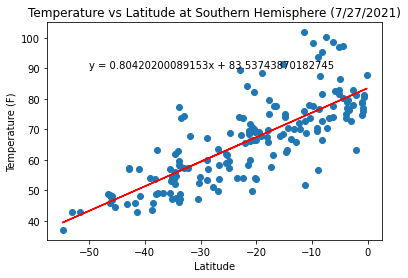

In [74]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Temperature vs Latitude at Southern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

In [ ]:
### analysis
# This plot shows that as the latitude is farther from the sourthern hemisphere, the temperature increases. 
# The slope is about 0.80 which is close to 1, suggesting that the relationship is a strong
# incline in temperature as the latitude is closer to 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

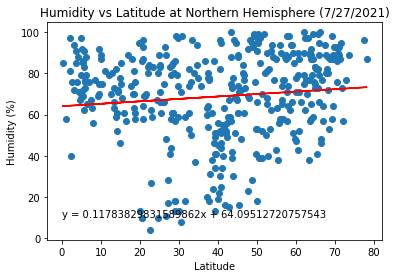

In [75]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Humidity vs Latitude at Northern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [ ]:
###analysis
#My theory before plotting this scatter and regression line was that humidity would be lower closer to the northern pole.
#Although this regression line does not show a strong relationship between humidity and latitude, it does suggest a possible 
#increase in humidity closer to the northern pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

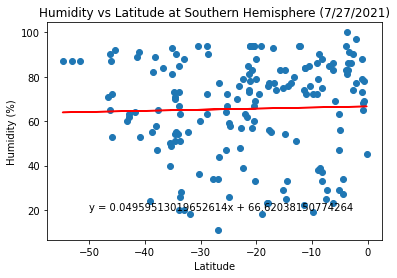

In [77]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Humidity vs Latitude at Southern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [ ]:
###analysis
#This linear regression line (slope = 0.05) shows that there is a very poor relationship between humidity and latitide.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

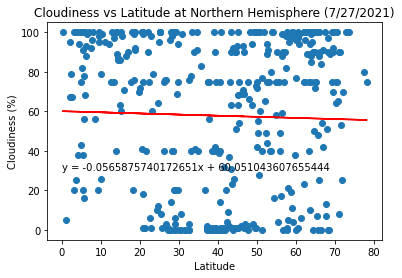

In [79]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Cloudiness vs Latitude at Northern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [ ]:
###analysis
#My hypothesis was there would be more clouds at the northern pole than at the equator. 
#This linear regression shows no strong evidence of a relationship between the two variables.
#Therefore, no reliable conclusion could be drawn based on this plot.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

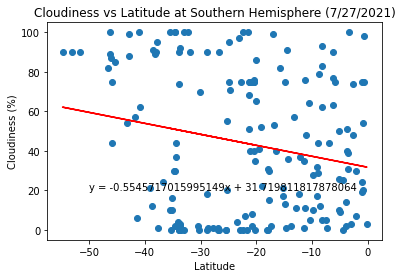

In [80]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Cloudiness vs Latitude at Southern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [ ]:
###analysis
#This linear regression shows a strong negative relationship between Cloudiness and latitude 
#suggesting that there more clouds at the sourthern pole than at the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

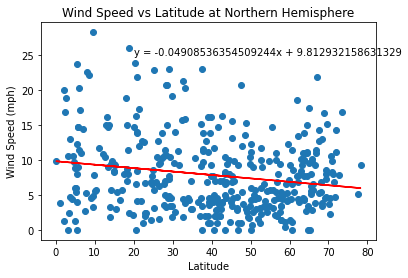

In [51]:
x_values = nor_hemis["Latitude"]
y_values = nor_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Wind Speed vs Latitude at Northern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [ ]:
###analysis
#Wind speed and latitude had no assumed relationship previous to this plot. 
#But this regression line shows a faint relationship suggesting 
#there is a higher wind speed away from the northern pole than at the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

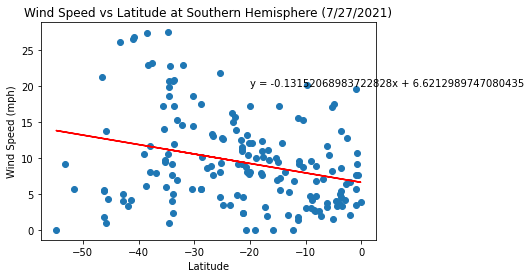

In [81]:
x_values = sou_hemis["Latitude"]
y_values = sou_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
plt.title('Wind Speed vs Latitude at Southern Hemisphere (7/27/2021)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [62]:
###analysis
#Similar to the northern pole, this regression line shows that there is a weak relationship suggesting that wind speed is higher
#at the southern pole than at the equator. 

In [ ]:
###three observable trends based on the data
#Temperature and Latitude have a strong relationship according to the linear regression, this proves that temperature rises as latitudes approach 0.
#Percent of cloudiness and latitude have a stronger relationship in the sourthern hemisphere than in the northern hemisphere.
#Humidity in the norther and southern hemispheres don't have strong relationships, this suggests that either a larger data set is required or that there is no quantifiable relationship between these two variables. 